In [55]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # for data preparation
import warnings
warnings.filterwarnings('ignore')

dff=pd.DataFrame()
dff=pd.read_csv("Netflix.csv")
dff.shape
dff.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,budget,gross,profit,Percentage Of profit,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,19000000,46998772,27998772,147.36,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,18000000,538375067,520375067,2890.97,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,3500000,83453539,79953539,2284.39,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,6000000,39846344,33846344,564.11,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,6000000,11492915,5492915,91.55,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,250000,32492674,32242674,12897.07,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,8000000,42368025,34368025,429.60,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,22000000,50427646,28427646,129.22,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from wordcloud import WordCloud
from textblob import TextBlob # for sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import csr_matrix
dff.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,budget,gross,profit,Percentage Of profit,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,19000000,46998772,27998772,147.36,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,18000000,538375067,520375067,2890.97,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,3500000,83453539,79953539,2284.39,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,6000000,39846344,33846344,564.11,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,6000000,11492915,5492915,91.55,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,250000,32492674,32242674,12897.07,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,8000000,42368025,34368025,429.60,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,22000000,50427646,28427646,129.22,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [57]:
dff = dff.replace(np.nan, '',regex=True)
dff.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,budget,gross,profit,Percentage Of profit,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,19000000,46998772,27998772,147.36,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,18000000,538375067,520375067,2890.97,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,3500000,83453539,79953539,2284.39,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,6000000,39846344,33846344,564.11,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,6000000,11492915,5492915,91.55,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,250000,32492674,32242674,12897.07,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,8000000,42368025,34368025,429.60,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,22000000,50427646,28427646,129.22,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


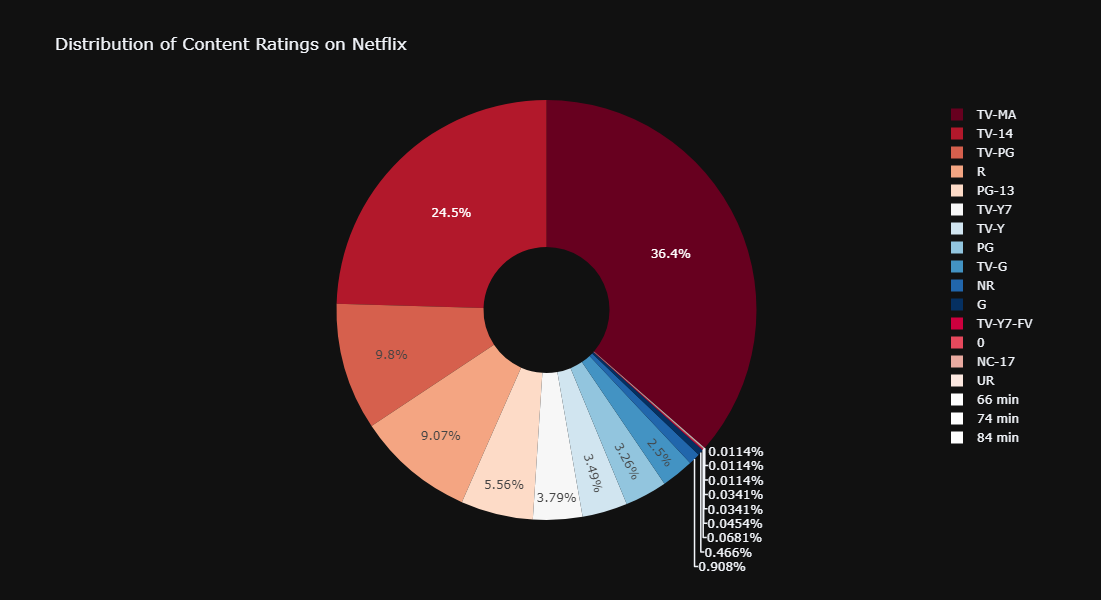

In [58]:
z = dff.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',template='plotly_dark',
                  color_discrete_sequence=px.colors.sequential.RdBu, hole=.3)
pieChart.update_layout(autosize=False,width=1100,height=600)
pieChart.show()

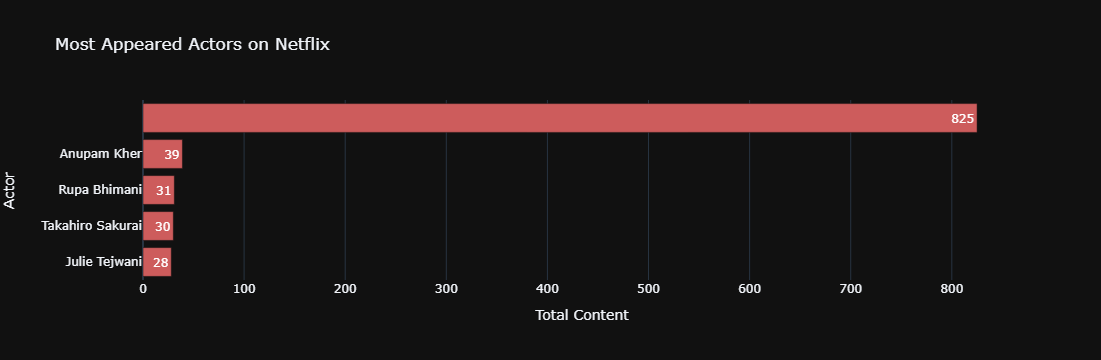

In [59]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Most Appeared Actors on Netflix', template="plotly_dark",  text_auto=True)
fig2.update_traces(marker_color='indianred' )
fig2.show()


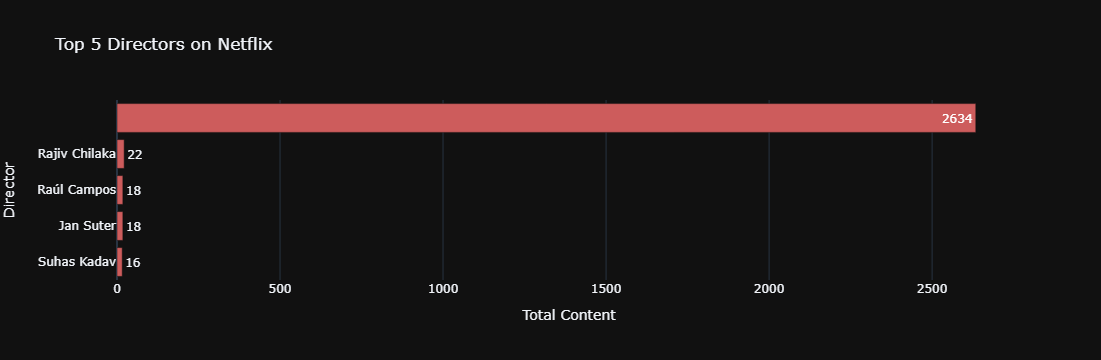

In [60]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head(5)
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix', template="plotly_dark",  text_auto=True)
fig1.update_traces(marker_color='indianred' )
fig1.show()

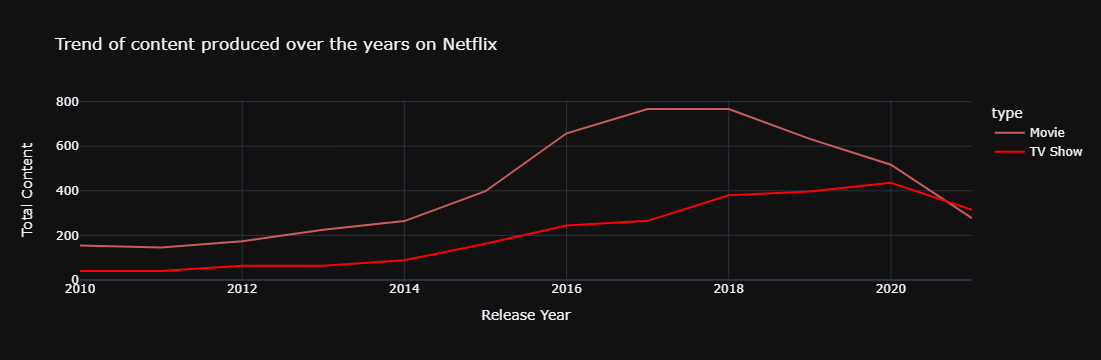

In [61]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix', template='plotly_dark',color_discrete_sequence=['indianred', 'red'])
#fig3.update_traces(line_color='indianred' )
fig3.show()

In [62]:
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'year','description':'description'})
dfx.head(10)

,year,description
0,2020,"As her father nears the end of his life, filmm..."
1,2021,"After crossing paths at a party, a Cape Town t..."
2,2021,To protect his family from a powerful drug lor...
3,2021,"Feuds, flirtations and toilet talk go down amo..."
4,2021,In a city of coaching centers known to train I...
5,2021,The arrival of a charismatic young priest brin...
6,2021,Equestria's divided. But a bright-eyed hero be...
7,1993,"On a photo shoot in Ghana, an American model s..."
8,2021,A talented batch of amateur bakers face off in...
9,2021,A woman adjusting to life after a loss contend...


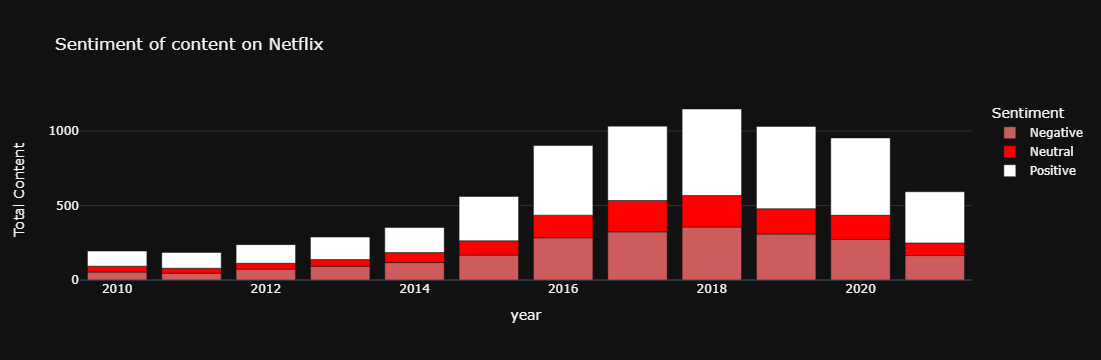

In [63]:

for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['year']>=2010]
fig4 = px.bar(dfx, x="year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix", template='plotly_dark',color_discrete_sequence=['indianred','red', 'white'])
fig4.show()

In [64]:
dfyr=dff.copy()
dfyr.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,budget,gross,profit,Percentage Of profit,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,19000000,46998772,27998772,147.36,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,18000000,538375067,520375067,2890.97,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,3500000,83453539,79953539,2284.39,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,6000000,39846344,33846344,564.11,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,"September 24, 2021",2021,TV-MA,1 Season,550000,39754601,39204601,7128.11,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,"September 24, 2021",2021,PG,91 min,27000000,115229890,88229890,326.78,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,18000000,23402427,5402427,30.01,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,54000000,108185706,54185706,100.34,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,10000000,15795189,5795189,57.95,"Comedies, Dramas",A woman adjusting to life after a loss contend...


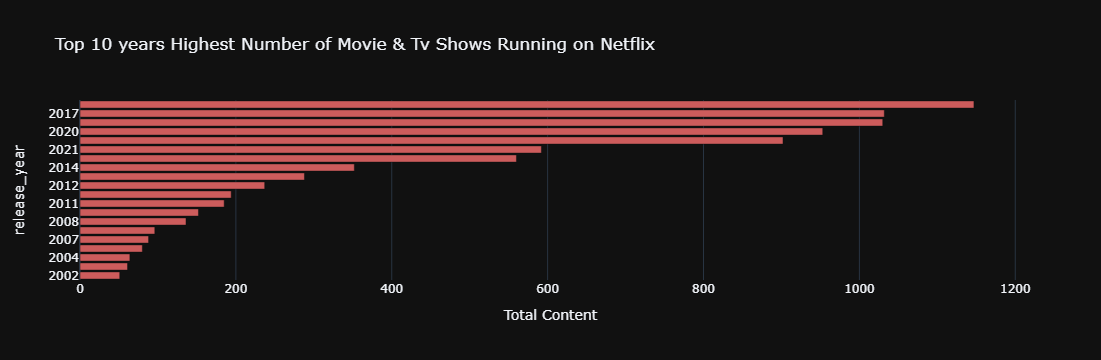

In [65]:
dff['release_year'] = dff['release_year'].fillna('No year Specified').astype(str)
filtered_release_year = pd.DataFrame()
filtered_release_year = dff['release_year'].str.split(',', expand=True).stack()
filtered_release_year = filtered_release_year.to_frame()
filtered_release_year.columns = ['release_year']
years = filtered_release_year.groupby(['release_year']).size().reset_index(name='Total Content')
years = years[years.release_year != 'No Year Specified']
years = years.sort_values(by=['Total Content'], ascending=False)
yearsTop10 = years.head(20)
yearsTop10 = yearsTop10.sort_values(by=['Total Content'])
fig2 = px.bar(yearsTop10, x='Total Content', y='release_year', title='Top 10 years Highest Number of Movie & Tv Shows Running on Netflix', template='plotly_dark', color_discrete_sequence=['indianred'])
fig2.show()

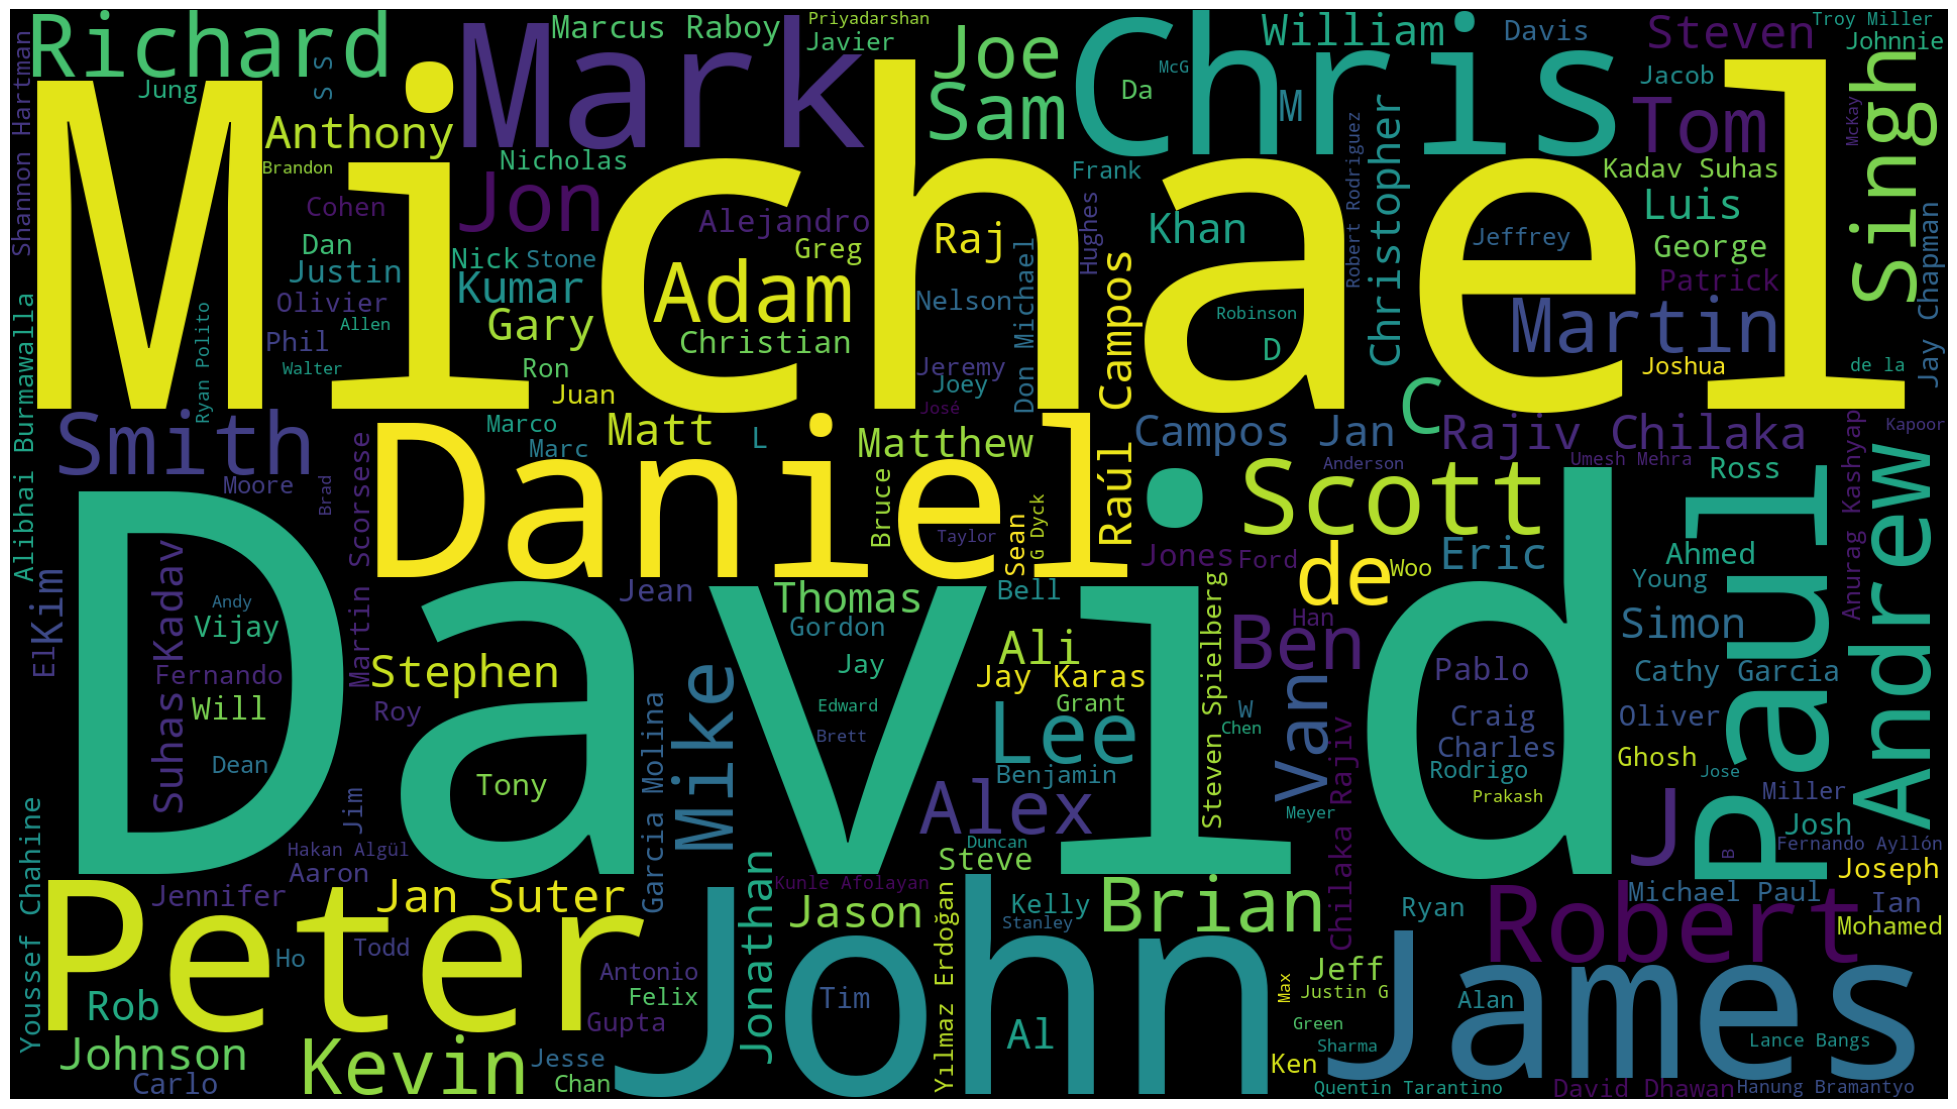

In [66]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dff.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('directors.png')
plt.show()

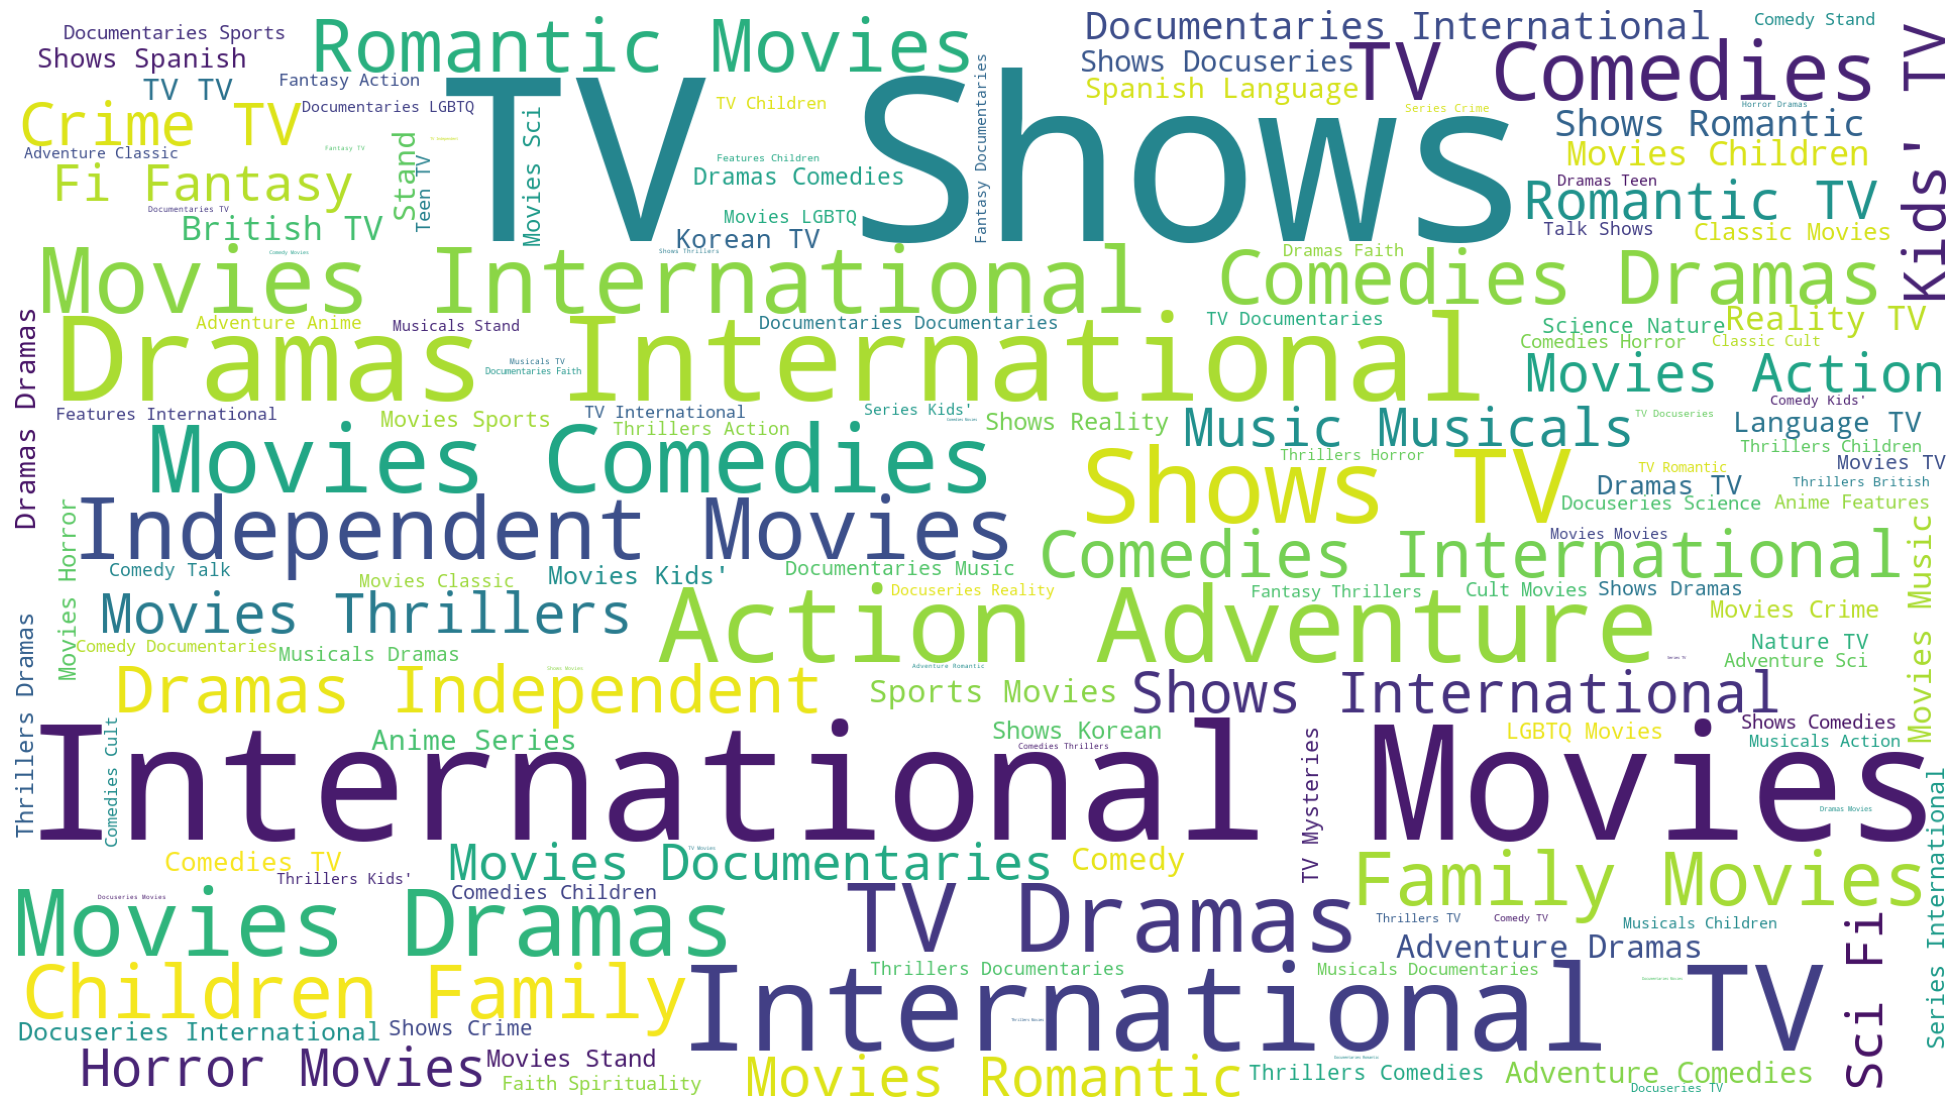

In [67]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dff.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('genre.png')
plt.show()

In [68]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dff['description'])
print(tfidf_matrix)

  (0, 8490)	0.33696767624101076
  (0, 6082)	0.20054299311773363
  (0, 7801)	0.16463147802014286
  (0, 18310)	0.22720271728772545
  (0, 3464)	0.3109717601819953
  (0, 8758)	0.3109717601819953
  (0, 4344)	0.18158280908846863
  (0, 15937)	0.27919454940575633
  (0, 9031)	0.3178095805166836
  (0, 9347)	0.35217431230742974
  (0, 6376)	0.22926768903690262
  (0, 9766)	0.12590836562639762
  (0, 5596)	0.2239952783710916
  (0, 11313)	0.30519046546477174
  (0, 6209)	0.16254396363689053
  (1, 1937)	0.27212415659761124
  (1, 274)	0.29671049220771517
  (1, 15364)	0.22219743512973616
  (1, 15967)	0.20679030022301806
  (1, 16504)	0.33933141195060634
  (1, 14720)	0.17558231498361754
  (1, 12993)	0.2671575311220847
  (1, 13140)	0.24719854905058733
  (1, 15002)	0.21314343523578164
  (1, 16741)	0.19305859063422645
  :	:
  (8805, 18779)	0.32697739216424
  (8805, 12899)	0.30175219271864745
  (8805, 6142)	0.27969353481020137
  (8805, 18061)	0.2736140574322149
  (8805, 10743)	0.2375712002433888
  (8805, 3198)	

In [69]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

(8807, 8807)


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define a function to get the index of a title from its title
def get_index_from_title(title):
    return dff[dff['title'] == title].index[0]

# Define a function to get the title from its index
def get_title_from_index(index):
    return dff.loc[index, 'title']

# Define a function to get the top n most similar items to a given item
def get_top_similar_items(item, n=10):
    # Get the index of the item
    item_index = get_index_from_title(item)
    
    # Get the pairwise cosine similarity scores for all items
    cosine_sim_scores = list(enumerate(cosine_sim[item_index]))
    
    # Sort the scores in descending order
    cosine_sim_scores_sorted = sorted(cosine_sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top n most similar items
    top_similar_items = cosine_sim_scores_sorted[1:n+1]
    
    # Get the titles of the top n most similar items
    top_similar_items_titles = [get_title_from_index(i[0]) for i in top_similar_items]
    
    return top_similar_items_titles

# Initialize a TfidfVectorizer object with English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'description' column of the DataFrame
tfidf_matrix = tfidf.fit_transform(dff['description'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Take user input
item = input("Enter the title of the item: ")

# Get and print the top 10 most similar items
top_similar_items = get_top_similar_items(item, 10)
print("The top 10 most similar items to", item, "are:")
for i, title in enumerate(top_similar_items):
    print(i+1, title)

Enter the title of the item:  Twilight


The top 10 most similar items to Twilight are:
1 The Twilight Saga: New Moon
2 The Twilight Saga: Eclipse
3 The Twilight Saga: Breaking Dawn: Part 1
4 The Twilight Saga: Breaking Dawn: Part 2
5 The Little Vampire
6 Satu Hari
7 Vampires
8 The Men Who Stare at Goats
9 Bella and the Bulldogs
10 Immortals


In [71]:
dfsk=dff.copy()
dfsk.rename(columns={' budget ': 'budget', ' gross': 'gross'}, inplace=True)
print(dfsk)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb                    
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [72]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

In [73]:
# Assuming 'dff' is your DataFrame and 'cast' column contains actors separated by comma
# Split the 'cast' column into separate actors
dfsk['cast'] = dfsk['cast'].str.split(',')

# Convert the list of actors to separate rows
dfsk = dfsk.explode('cast')
dfsk

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,budget,gross,profit,Percentage Of profit,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,19000000,46998772,27998772,147.36,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,4500000,58853106,54353106,1207.85,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,25000000,11444204,-13555796,-54.22,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,25000000,11444204,-13555796,-54.22,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,25000000,11444204,-13555796,-54.22,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,25000000,11444204,-13555796,-54.22,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [74]:
dfyr=dfsk.copy()
print(dfyr)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water                    
1         s2  TV Show         Blood & Water                    
1         s2  TV Show         Blood & Water                    
1         s2  TV Show         Blood & Water                    
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                        cast        country          date_added release_year  \
0                             United States  September 25, 2021         2020   
1                 Ama Qamata   South Africa  September 24, 2021        

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variables into numerical ones
le_director = preprocessing.LabelEncoder()
le_cast = preprocessing.LabelEncoder()


dfyr['director'] = le_director.fit_transform(dfyr['director'].astype(str))
dfyr['cast'] = le_cast.fit_transform(dfyr['cast'].astype(str))

# Create new features
dfyr['avg_budget_director'] = dfyr.groupby('director')['budget'].transform('mean')
dfyr['avg_gross_director'] = dfyr.groupby('director')['gross'].transform('mean')
dfyr['avg_profit_director'] = dfyr.groupby('director')['profit'].transform('mean')

dfyr['avg_budget_cast'] = dfyr.groupby('cast')['budget'].transform('mean')
dfyr['avg_gross_cast'] = dfyr.groupby('cast')['gross'].transform('mean')
dfyr['avg_profit_cast'] = dfyr.groupby('cast')['profit'].transform('mean')

# Define predictors and target variable
X = dfyr[['director', 'cast', 'avg_budget_director', 'avg_gross_director', 'avg_profit_director', 'avg_budget_cast', 'avg_gross_cast', 'avg_profit_cast']]
y = dfyr['budget']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate and print the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Function to create feature vector
def create_feature_vector(director, cast):
    if director in le_director.classes_:
        director_label = le_director.transform([director])[0]
        avg_budget_director = dfyr[dfyr['director'] == director_label]['avg_budget_director'].mean()
        avg_gross_director = dfyr[dfyr['director'] == director_label]['avg_gross_director'].mean()
        avg_profit_director = dfyr[dfyr['director'] == director_label]['avg_profit_director'].mean()
    else:
        director_label = -1
        avg_budget_director = dfyr['avg_budget_director'].mean()
        avg_gross_director = dfyr['avg_gross_director'].mean()
        avg_profit_director = dfyr['avg_profit_director'].mean()

    if cast in le_cast.classes_:
        cast_label = le_cast.transform([cast])[0]
        avg_budget_cast = dfyr[dfyr['cast'] == cast_label]['avg_budget_cast'].mean()
        avg_gross_cast = dfyr[dfyr['cast'] == cast_label]['avg_gross_cast'].mean()
        avg_profit_cast = dfyr[dfyr['cast'] == cast_label]['avg_profit_cast'].mean()
    else:
        cast_label = -1
        avg_budget_cast = dfyr['avg_budget_cast'].mean()
        avg_gross_cast = dfyr['avg_gross_cast'].mean()
        avg_profit_cast = dfyr['avg_profit_cast'].mean()

    return [director_label, cast_label, avg_budget_director, avg_gross_director, avg_profit_director, avg_budget_cast, avg_gross_cast, avg_profit_cast]

# Now you can predict the budget for a new director and cast
director_new = 'Quentin Tarantino'
cast_new = 'Robert Pattinson'
features = create_feature_vector(director_new, cast_new)

# Convert features to a DataFrame with the correct feature names
features_df = pd.DataFrame([features], columns=X.columns)

# Use the model to make the prediction
budget_pred = model.predict(features_df)

print(f'Predicted budget: {budget_pred[0]}')

Mean Squared Error: 421661188648933.94
R^2 Score: 0.6756772361513874
Predicted budget: 66531644.346666664


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variables into numerical ones
le_director = preprocessing.LabelEncoder()
le_cast = preprocessing.LabelEncoder()

dfyr['director'] = le_director.fit_transform(dfyr['director'].astype(str))
dfyr['cast'] = le_cast.fit_transform(dfyr['cast'].astype(str))

# Create new features
dfyr['avg_budget_director'] = dfyr.groupby('director')['budget'].transform('mean')
dfyr['avg_gross_director'] = dfyr.groupby('director')['gross'].transform('mean')
dfyr['avg_profit_director'] = dfyr.groupby('director')['profit'].transform('mean')

dfyr['avg_budget_cast'] = dfyr.groupby('cast')['budget'].transform('mean')
dfyr['avg_gross_cast'] = dfyr.groupby('cast')['gross'].transform('mean')
dfyr['avg_profit_cast'] = dfyr.groupby('cast')['profit'].transform('mean')

# Define predictors and target variable
X = dfyr[['director', 'cast', 'avg_budget_director', 'avg_gross_director', 'avg_profit_director', 'avg_budget_cast', 'avg_gross_cast', 'avg_profit_cast']]
y = dfyr['budget']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate and print the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Function to create feature vector
def create_feature_vector(director, cast):
    if director in le_director.classes_:
        director_label = le_director.transform([director])
        avg_budget_director = dfyr[dfyr['director'] == director_label]['avg_budget_director'].mean()
        avg_gross_director = dfyr[dfyr['director'] == director_label]['avg_gross_director'].mean()
        avg_profit_director = dfyr[dfyr['director'] == director_label]['avg_profit_director'].mean()
    else:
        director_label = -1
        avg_budget_director = dfyr['avg_budget_director'].mean()
        avg_gross_director = dfyr['avg_gross_director'].mean()
        avg_profit_director = dfyr['avg_profit_director'].mean()

    if cast in le_cast.classes_:
        cast_label = le_cast.transform([cast])
        avg_budget_cast = dfyr[dfyr['cast'] == cast_label]['avg_budget_cast'].mean()
        avg_gross_cast = dfyr[dfyr['cast'] == cast_label]['avg_gross_cast'].mean()
        avg_profit_cast = dfyr[dfyr['cast'] == cast_label]['avg_profit_cast'].mean()
    else:
        cast_label = -1
        avg_budget_cast = dfyr['avg_budget_cast'].mean()
        avg_gross_cast = dfyr['avg_gross_cast'].mean()
        avg_profit_cast = dfyr['avg_profit_cast'].mean()

    return [director_label, cast_label, avg_budget_director, avg_gross_director, avg_profit_director, avg_budget_cast, avg_gross_cast, avg_profit_cast]

# Now you can predict the budget for a new director and cast
director_new = 'Quentin Tarantino'
cast_new = 'Robert Pattintion'
features = create_feature_vector(director_new, cast_new)

# Convert features to a DataFrame with the correct feature names
features_df = pd.DataFrame([features], columns=X.columns)

# Use the model to make the prediction
budget_pred = model.predict(features_df)

print(f'Predicted budget: {budget_pred[0]}')

# Print the predicted and actual values for comparison
for predicted, actual in zip(y_pred, y_test):
    print(f'Predicted: {predicted}, Actual: {actual}')

Mean Squared Error: 300158143418419.5
R^2 Score: 0.7691318971588347
Predicted budget: 32537612.194662094
Predicted: 7002401.75671021, Actual: 5000000
Predicted: 17950815.96222808, Actual: 18000000
Predicted: 39167460.700279124, Actual: 10000000
Predicted: 17309015.981982388, Actual: 5000000
Predicted: 5499234.244156251, Actual: 10000
Predicted: -18912.986117593933, Actual: 5000
Predicted: 3628585.549366176, Actual: 5000000
Predicted: 72607976.26613641, Actual: 100000000
Predicted: 12877404.232971076, Actual: 11000000
Predicted: 8600942.119143305, Actual: 6000000
Predicted: 46377012.25030527, Actual: 8000000
Predicted: 44934337.34926536, Actual: 8000000
Predicted: 30958631.6944691, Actual: 60000000
Predicted: 70668442.27291179, Actual: 18000000
Predicted: 38660679.72694555, Actual: 38000000
Predicted: 14485263.886415048, Actual: 15000000
Predicted: 56122390.39368036, Actual: 61000000
Predicted: 28998731.2793009, Actual: 7000000
Predicted: 81538715.07327202, Actual: 80000000
Predicted: 3

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Convert categorical variables into numerical ones
le_director = preprocessing.LabelEncoder()
le_cast = preprocessing.LabelEncoder()

dfyr['director'] = le_director.fit_transform(dfyr['director'].astype(str))
dfyr['cast'] = le_cast.fit_transform(dfyr['cast'].astype(str))

# Create new features
dfyr['avg_budget_director'] = dfyr.groupby('director')['budget'].transform('mean')
dfyr['avg_gross_director'] = dfyr.groupby('director')['gross'].transform('mean')
dfyr['avg_profit_director'] = dfyr.groupby('director')['profit'].transform('mean')

dfyr['avg_budget_cast'] = dfyr.groupby('cast')['budget'].transform('mean')
dfyr['avg_gross_cast'] = dfyr.groupby('cast')['gross'].transform('mean')
dfyr['avg_profit_cast'] = dfyr.groupby('cast')['profit'].transform('mean')

# Define predictors and target variable
X = dfyr[['director', 'cast', 'avg_budget_director', 'avg_gross_director', 'avg_profit_director', 'avg_budget_cast', 'avg_gross_cast', 'avg_profit_cast']]
y = dfyr['budget']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate and print the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Function to create feature vector
def create_feature_vector(director, cast):
    if director in le_director.classes_:
        director_label = le_director.transform([director])[0]
        avg_budget_director = dfyr[dfyr['director'] == director_label]['avg_budget_director'].mean()
        avg_gross_director = dfyr[dfyr['director'] == director_label]['avg_gross_director'].mean()
        avg_profit_director = dfyr[dfyr['director'] == director_label]['avg_profit_director'].mean()
    else:
        director_label = -1
        avg_budget_director = dfyr['avg_budget_director'].mean()
        avg_gross_director = dfyr['avg_gross_director'].mean()
        avg_profit_director = dfyr['avg_profit_director'].mean()

    if cast in le_cast.classes_:
        cast_label = le_cast.transform([cast])[0]
        avg_budget_cast = dfyr[dfyr['cast'] == cast_label]['avg_budget_cast'].mean()
        avg_gross_cast = dfyr[dfyr['cast'] == cast_label]['avg_gross_cast'].mean()
        avg_profit_cast = dfyr[dfyr['cast'] == cast_label]['avg_profit_cast'].mean()
    else:
        cast_label = -1
        avg_budget_cast = dfyr['avg_budget_cast'].mean()
        avg_gross_cast = dfyr['avg_gross_cast'].mean()
        avg_profit_cast = dfyr['avg_profit_cast'].mean()

    return [director_label, cast_label, avg_budget_director, avg_gross_director, avg_profit_director, avg_budget_cast, avg_gross_cast, avg_profit_cast]

# Now you can predict the budget for a new director and cast
director_new = 'Quentin Tarantino'
cast_new = 'Robert Pattintion'
features = create_feature_vector(director_new, cast_new)

# Convert features to a DataFrame with the correct feature names
features_df = pd.DataFrame([features], columns=X.columns)

# Use the model to make the prediction
budget_pred = model.predict(features_df)

print(f'Predicted budget: {budget_pred[0]}')

Epoch 1/100
1624/1624 [==============================] - 2s 1ms/step - loss: 471282097324032.0000
Epoch 2/100
1624/1624 [==============================] - 2s 1ms/step - loss: 392187154006016.0000
Epoch 3/100
1624/1624 [==============================] - 2s 1ms/step - loss: 383495281049600.0000
Epoch 4/100
1624/1624 [==============================] - 2s 1ms/step - loss: 376787347439616.0000
Epoch 5/100
1624/1624 [==============================] - 2s 1ms/step - loss: 372026074202112.0000
Epoch 6/100
1624/1624 [==============================] - 2s 1ms/step - loss: 368128626262016.0000
Epoch 7/100
1624/1624 [==============================] - 2s 1ms/step - loss: 365553323606016.0000
Epoch 8/100
1624/1624 [==============================] - 2s 1ms/step - loss: 363375171207168.0000
Epoch 9/100
1624/1624 [==============================] - 2s 1ms/step - loss: 362334144954368.0000
Epoch 10/100
1624/1624 [==============================] - 2s 1ms/step - loss: 360410167377920.0000
Epoch 11/100
1624/1

In [78]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'movie_name' is the column with the movie names
twilight_df = dff[dff['title'].str.contains('The Twilight Saga')]

print(twilight_df)

# Now 'twilight_df' contains only the rows where the movie name includes 'The Twilight Saga'

    show_id   type                                     title     director  \
447    s448  Movie  The Twilight Saga: Breaking Dawn: Part 1  Bill Condon   
448    s449  Movie  The Twilight Saga: Breaking Dawn: Part 2  Bill Condon   
449    s450  Movie                The Twilight Saga: Eclipse  David Slade   
450    s451  Movie               The Twilight Saga: New Moon  Chris Weitz   

                                                  cast        country  \
447  Kristen Stewart, Robert Pattinson, Taylor Laut...  United States   
448  Kristen Stewart, Robert Pattinson, Taylor Laut...  United States   
449  Kristen Stewart, Robert Pattinson, Taylor Laut...  United States   
450  Kristen Stewart, Robert Pattinson, Taylor Laut...  United States   

        date_added release_year rating duration    budget      gross  \
447  July 16, 2021         2011  PG-13  117 min   3000000  153633143   
448  July 16, 2021         2012  PG-13  115 min  50000000   86572238   
449  July 16, 2021         2010 

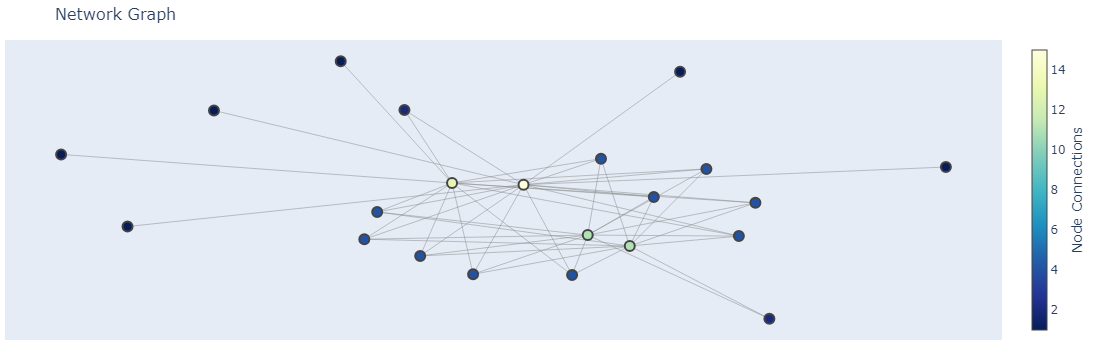

In [79]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd

# Assuming 'df' is your DataFrame with the movie information

# Create a graph
G = nx.Graph()

# Add nodes and edges for titles, directors, and cast members
for _, row in twilight_df.iterrows():
    movie_title = row['title']
    director = row['director']
    cast_members = row['cast'].split(', ')
    
    G.add_node(movie_title)
    G.add_edge(movie_title, director)
    
    for cast in cast_members:
        G.add_node(cast)
        G.add_edge(movie_title, cast)

# Create position layout
pos = nx.spring_layout(G)

# Create edges as a trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create nodes as a trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Color node points by the number of connections
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = f'{str(adjacencies[0])} # of connections: {str(len(adjacencies[1]))}'
    node_trace['text'] += tuple([node_info])

# Create a figure and show the graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network Graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

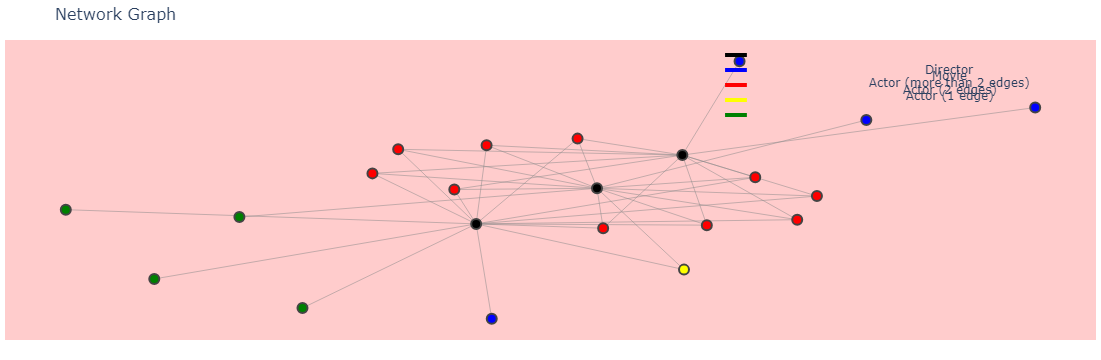

In [80]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd

# Assuming 'df' is your DataFrame with the movie information

# Create a graph
G = nx.Graph()

# Add nodes and edges for titles, directors, and cast members
for _, row in twilight_df.iterrows():
    movie_title = row['title']
    director = row['director']
    cast_members = row['cast'].split(', ')
    
    G.add_node(director)
    
    for cast in cast_members:
        G.add_node(cast)
        G.add_edge(director, cast, title=movie_title, director=director, rating=row['rating'], budget=row['budget'], release_year=row['release_year'])
        
    G.add_node(movie_title)
    G.add_edge(director, movie_title)

# Create position layout
pos = nx.spring_layout(G)

# Create edges as a trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines+markers')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create nodes as a trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='Blackbody',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node, attr in G.nodes(data=True):
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    if attr:  # Check if node has attributes
        node_info = '<br>'.join([f'{key}: {value}' for key, value in attr.items()])
        node_trace['text'] += tuple([node_info])
    else:
        # If no attributes, display the node label and any connected movie information
        movie_info = '<br>'.join([f'{key}: {value}' for key, value in G[node][list(G.neighbors(node))[0]].items()])
        node_trace['text'] += tuple([f'{node}, {movie_info}'])

# Color node points based on the type of node and number of connections
node_colors = []  # Define your own list of colors here
for node in G.nodes():
    if node in twilight_df['director'].values:  # If the node is a director
        node_colors.append('black')
    elif node in twilight_df['title'].values:  # If the node is a movie
        node_colors.append('blue')
    else:  # If the node is an actor
        num_edges = len(list(G.neighbors(node)))
        if num_edges > 2:
            node_colors.append('red')
        elif num_edges == 2:
            node_colors.append('yellow')  # Replace with the color you want
        else:
            node_colors.append('green')  # Replace with the color you want
node_trace['marker']['color'] = node_colors

# Create a figure and show the graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network Graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                plot_bgcolor='rgba(255,0,0,0.2)',
                annotations=[
                    dict(
                        text="Director",
                        showarrow=False,
                        align='left',
                        x=0.7,
                        y=0.945
                    ),
                    dict(
                        text="Movie",
                        showarrow=False,
                        align='left',
                        x=0.7,
                        y=0.895
                    ),
                    dict(
                        text="Actor (more than 2 edges)",
                        showarrow=False,
                        align='left',
                        x=0.7,
                        y=0.845
                    ),
                    dict(
                        text="Actor (2 edges)",
                        showarrow=False,
                        align='left',
                        x=0.7,
                        y=0.795
                    ),
                    dict(
                        text="Actor (1 edge)",
                        showarrow=False,
                        align='left',
                        x=0.7,
                        y=0.745
                    )
                ],
                shapes=[
                    dict(
                        type="line",
                        xref="paper",
                        yref="paper",
                        x0=0.68,
                        y0=0.95,
                        x1=0.66,
                        y1=0.95,
                        line=dict(
                            color="black",
                            width=4
                        )
                    ),
                    dict(
                        type="line",
                        xref="paper",
                        yref="paper",
                        x0=0.68,
                        y0=0.9,
                        x1=0.66,
                        y1=0.9,
                        line=dict(
                            color="blue",
                            width=4
                        )
                    ),
                    dict(
                        type="line",
                        xref="paper",
                        yref="paper",
                        x0=0.68,
                        y0=0.85,
                        x1=0.66,
                        y1=0.85,
                        line=dict(
                            color="red",
                            width=4
                        )
                    ),
                    dict(
                        type="line",
                        xref="paper",
                        yref="paper",
                        x0=0.68,
                        y0=0.8,
                        x1=0.66,
                        y1=0.8,
                        line=dict(
                            color="yellow",
                            width=4
                        )
                    ),
                    dict(
                        type="line",
                        xref="paper",
                        yref="paper",
                        x0=0.68,
                        y0=0.75,
                        x1=0.66,
                        y1=0.75,
                        line=dict(
                            color="green",
                            width=4
                        )
                    )
                ]))

fig.show()

In [81]:
twilight_df = twilight_df.rename(columns={
    ' budget ': 'budget'
})
print(twilight_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'budget', 'gross', 'profit',
       'Percentage Of profit', 'listed_in', 'description'],
      dtype='object')
